In [64]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

In [65]:
customer_data = pd.read_csv('BlackFriday.csv')

In [66]:
customer_data = customer_data.drop(columns=['Product_Category_2', 'Product_Category_3'], inplace=False,axis=1)

In [67]:
del customer

In [68]:
customer = customer_data.copy()

In [104]:
customer_data.Product_Category_1.nunique()

18

## Feature Engineering

In [70]:
customer['User_ID'] = customer['User_ID'].astype('str', copy=False)
customer['Occupation'] = customer['Occupation'].astype('str', copy=False)
customer['Marital_Status'] =  customer['Marital_Status'].map({0 : 'UnMarried', 1: 'Married'})
customer['Product_Category_1'] = customer['Product_Category_1'].astype('str', copy=False)

# Setting all the categorical columns to type category
for col in set(customer.columns) - set(customer.describe().columns):
    customer[col] = customer[col].astype('category')
    

print(customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
User_ID                       537577 non-null category
Product_ID                    537577 non-null category
Gender                        537577 non-null category
Age                           537577 non-null category
Occupation                    537577 non-null category
City_Category                 537577 non-null category
Stay_In_Current_City_Years    537577 non-null category
Marital_Status                537577 non-null category
Product_Category_1            537577 non-null category
Purchase                      537577 non-null int64
dtypes: category(9), int64(1)
memory usage: 10.1 MB
None


# Average Value

## User_ID

In [71]:
user_id_avg = customer.pivot_table(index='User_ID', values='Purchase', aggfunc=np.mean)

user_id_avg = user_id_avg.rename(index=str, columns={'Purchase': 'Avg_User_Purchase'}) 

In [72]:
customer = customer.set_index('User_ID').join(user_id_avg, on= 'User_ID')

## Product ID

In [73]:
## new df which contains Avg value for the column value
Product_ID_avg = customer.pivot_table(index='Product_ID', values="Purchase", aggfunc=np.mean)

## Change the name of the column
Product_ID_avg = Product_ID_avg.rename(index= str, columns ={'Purchase': 'Avg_ProductID_Purchase'})

In [74]:
customer.index = customer.Product_ID

In [75]:
customer = customer.merge(Product_ID_avg, on='Product_ID' )

## Gender

In [76]:
gender_avg = customer.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)

gender_avg = gender_avg.rename(index= str, columns ={'Purchase': 'Avg_Gender_Purchase'})

In [106]:
gender_avg

,Avg_Gender_Purchase
Gender,
F,8809.761349
M,9504.771713


In [78]:
customer.index = customer.Gender

In [79]:
customer = customer.join(gender_avg, on='Gender')

## Age

In [80]:
age_avg = customer.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)

age_avg = age_avg.rename(index= str, columns ={'Purchase': 'Avg_Age_Purchase'})
age_avg

,Avg_Age_Purchase
Age,
0-17,9020.126878
18-25,9235.197575
26-35,9314.588970
36-45,9401.478758
46-50,9284.872277
51-55,9620.616620
55+,9453.898579


In [81]:
customer.index = customer.Age

customer = customer.join(age_avg, on='Age')

In [82]:
customer.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase', 'Avg_User_Purchase', 'Avg_ProductID_Purchase',
       'Avg_Gender_Purchase', 'Avg_Age_Purchase'],
      dtype='object')

## Occupation

In [107]:
Occupation_Avg = customer.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
Occupation_Avg = Occupation_Avg.rename(index= str, columns ={'Purchase': 'Avg_Occupation_Purchase'})
Occupation_Avg

,Avg_Occupation_Purchase
Occupation,
0,9186.946726
1,9017.703095
10,9052.836410
11,9299.467190
12,9883.052460
13,9424.449391
14,9568.536426
15,9866.239925
16,9457.133118


In [84]:
customer.index = customer.Occupation

In [85]:
customer = customer.join(Occupation_Avg, on='Occupation')

## City_Category

In [86]:
City_Category_avg = customer.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)

City_Category_avg = City_Category_avg.rename(index= str, columns ={'Purchase': 'Avg_City_Category_Purchase'})

In [108]:
City_Category_avg

,Avg_City_Category_Purchase
City_Category,
A,8958.011014
B,9198.657848
C,9844.441855


In [87]:
customer.index = customer.City_Category

In [88]:
customer = customer.join(City_Category_avg, on='City_Category')

## Stay_In_Current_City_Years

In [89]:
Stay_In_Current_City_Years_avg = customer.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)

Stay_In_Current_City_Years_avg = Stay_In_Current_City_Years_avg.rename(index= str, columns ={'Purchase': 'Avg_Stay_Years_Purchase'})

In [109]:
Stay_In_Current_City_Years_avg

,Avg_Stay_Years_Purchase
Stay_In_Current_City_Years,
0,9247.238625
1,9319.865095
2,9397.607316
3,9350.685121
4+,9346.370158


In [90]:
customer.index = customer.Stay_In_Current_City_Years

In [91]:
customer = customer.join(Stay_In_Current_City_Years_avg, on='Stay_In_Current_City_Years')

## Marital_Status

In [92]:
Marital_Status_avg = customer.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)

Marital_Status_avg = Marital_Status_avg.rename(index= str, columns ={'Purchase': 'Avg_Marital_Status_Purchase'})

In [110]:
Marital_Status_avg

,Avg_Marital_Status_Purchase
Marital_Status,
Married,9334.632681
UnMarried,9333.325467


In [93]:
customer.index = customer.Marital_Status

In [94]:
customer = customer.join(Marital_Status_avg, on='Marital_Status')

## Product_Category_1

In [95]:
Product_Category_1_avg = customer.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)

Product_Category_1_avg = Product_Category_1_avg.rename(index= str, columns ={'Purchase': 'Avg_Product_Category_1_Purchase'})

In [96]:
customer.index = customer.Product_Category_1

In [97]:
customer = customer.join(Product_Category_1_avg, on='Product_Category_1')

## Dropping User ID and Product ID

In [35]:
customer = customer.drop(columns=[ 'Product_ID'], inplace=False, axis=1)

In [98]:
# Setting all the categorical columns to type category
for col in set(customer.columns) - set(customer.describe().columns):
    customer[col] = customer[col].astype('category')
    

print(customer.info())

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 537577 entries, 3 to 13
Data columns (total 18 columns):
Product_ID                         537577 non-null category
Gender                             537577 non-null category
Age                                537577 non-null category
Occupation                         537577 non-null category
City_Category                      537577 non-null category
Stay_In_Current_City_Years         537577 non-null category
Marital_Status                     537577 non-null category
Product_Category_1                 537577 non-null category
Purchase                           537577 non-null int64
Avg_User_Purchase                  537577 non-null float64
Avg_ProductID_Purchase             537577 non-null float64
Avg_Gender_Purchase                537577 non-null float64
Avg_Age_Purchase                   537577 non-null float64
Avg_Occupation_Purchase            537577 non-null float64
Avg_City_Category_Purchase         537577 non-null floa

## Polychotomization

In [38]:
features = list(customer.columns)
features.remove('Purchase')
features

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Avg_User_Purchase',
 'Avg_ProductID_Purchase',
 'Avg_Gender_Purchase',
 'Avg_Age_Purchase',
 'Avg_Occupation_Purchase',
 'Avg_City_Category_Purchase',
 'Avg_Stay_Years_Purchase',
 'Avg_Marital_Status_Purchase',
 'Avg_Product_Category_1_Purchase']

In [39]:
customer_polychot = pd.get_dummies(data=customer[features], drop_first=True)

## Modeling

In [42]:
x = customer_polychot.copy()
y = customer_data['Purchase']

In [43]:
## Adjusted R^2
def AdjRsquare(model, x, y):
    Rsquare = model.score(x, y)
    NoData = len(y)
    p = x.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData - 1
                                  )/(NoData - p - 1)
    return tempRsquare

In [44]:
## Combine all the steps to test the model performance
def linRegcheckModelPerformance(x, y):
    model = LinearRegression()
    # Covert data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 666, shuffle= True)
    # Build model with train data set
    model.fit(x_train, y_train)
    # Train accuracies
    trainR2 = model.score(x_train, y_train)
    predictedPurchaseTrain= model.predict(x_train)
    TrainMse = metrics.mean_squared_error(y_train, predictedPurchaseTrain)
    trainRmse = np.sqrt(TrainMse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model, x_train, y_train)
    trainAccuracies = [trainRmse, trainRmsePct, trainR2, trainAdjR2]
    # Test accuracies
    testR2 = model.score(x_test, y_test)
    predictedPurchaseTest = model.predict(x_test)
    TestMse = metrics.mean_squared_error( y_test, predictedPurchaseTest)
    testRmse = np.sqrt(TestMse)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model, x_test, y_test)
    testAccuracies = [testRmse, testRmsePct, testR2, testAdjR2]
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["rmse", "rmsePct", "r2", "adjR2"])
    resultsDf['trainAccuracy'] = trainAccuracies
    resultsDf['testAccuracy'] = testAccuracies
    return ( round(resultsDf, 2))

In [45]:
linRegcheckModelPerformance(x,y)

,trainAccuracy,testAccuracy
rmse,4979.71,4984.36
rmsePct,53.37,53.31
r2,0.00,-0.00
adjR2,0.00,-0.00


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 666, shuffle= True)

In [54]:
rfreg = RandomForestRegressor(n_estimators=25)
rfmodel = rfreg.fit(x_train, y_train)

In [61]:
rfmodel.score(x_test,y_test)

-0.17100897265992776

In [55]:
y_pred = rfmodel.predict(x_test)

In [62]:
metrics.mean_absolute_error(y_test,y_pred)

4346.206331336731

In [56]:
indices = np.argsort(rfmodel.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(x_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         x_train.columns[indices[f]],
                         rfmodel.feature_importances_[indices[f]]]

In [58]:
import seaborn as sns

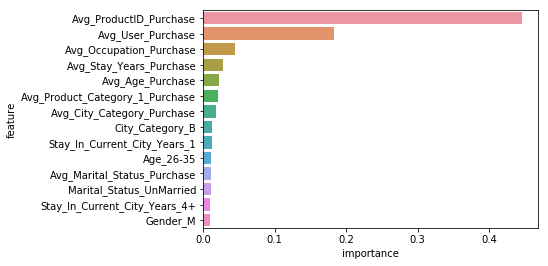

In [59]:
## Top 20
top = feature_rank[feature_rank['rank'] < 15]
sns.barplot( y = 'feature', x = 'importance', data = top )

In [60]:
top

,rank,feature,importance
0,1,Avg_ProductID_Purchase,0.446003
1,2,Avg_User_Purchase,0.182682
2,3,Avg_Occupation_Purchase,0.044451
3,4,Avg_Stay_Years_Purchase,0.027855
4,5,Avg_Age_Purchase,0.022047
5,6,Avg_Product_Category_1_Purchase,0.021150
6,7,Avg_City_Category_Purchase,0.018597
7,8,City_Category_B,0.012824
8,9,Stay_In_Current_City_Years_1,0.011839
9,10,Age_26-35,0.010869


## Most Important Variables

### Avg_ProductID_Purchase

### Avg_User_Purchase